#Test2 - v3

Split the solutions of the sub tasks in Task 1 and 2 into separate cells.

##Task1 (16 points)

1. Load the MNIST image dataset (with the help of Keras functions).
2. Reduce the training dataset to 50 images per category and the test dataset to 10 images per category.
3. Shuffle both datasets. Normalize input data to the range (<0,1).
4. Create the autoencoder model for the reduced dataset with at least two hidden layers in both the encoder and decoder. At least one layer in the encoder will be a Conv2D layer with 30 filters. The dimension of latent space will be 4. Ensure that the output values of the model will be in the range <0,1).
5. Train the model with Adam optimizer with learning rate = 0.004 and mse as loss and matrics function. Use 30 epochs, and batch size = 32. Use the test set as validation data during training.
6. Split the trained model into an encoder and decoder.
7. Use the decoder model to generate four new images based on random values in latent space.
8. Display the generated images.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.datasets import mnist
import random as rnd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Generating subsets
def generate_dataset_subset(subset_size,train_x,train_y):
  t_x=[]
  t_y=[]

  sz = len(train_x)
  distinct_values = np.unique(train_y)

  for i in range(subset_size):
    index=rnd.randint(0,sz-1)
    for i in range(len(distinct_values)):
      while(i!=train_y[index]):
        index=rnd.randint(0,sz-1)
      t_x.append(train_x[index])  # Do not flatten
      t_y.append(train_y[index])

  return t_x,t_y

(train_x,train_y),(test_x,test_y)=mnist.load_data()
tr_x,tr_y=generate_dataset_subset(50,train_x,train_y);
ts_x,ts_y=generate_dataset_subset(10,test_x,test_y);

print(len(tr_x))
print(len(ts_y))

# shuffling the data
tr_x,tr_y=shuffle(tr_x,tr_y,random_state=42)
ts_x,ts_y=shuffle(ts_x,ts_y,random_state=42)

# After reshaping: (-1, 28, 28, 1)
tr_x = np.array(tr_x).reshape(-1, 28, 28, 1)
ts_x = np.array(ts_x).reshape(-1, 28, 28, 1)


# performing Normalization
tr_x=np.array(tr_x).astype(np.float32)/255.0
ts_x=np.array(ts_x).astype(np.float32)/255.0
print(ts_x[0].shape)
print(tr_x[0].shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
500
100
(28, 28, 1)
(28, 28, 1)


In [ ]:
import tensorflow as tf
from keras import models,layers,optimizers

encoder_inputs = layers.Input(shape=(28, 28, 1))
encoder=models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding= "same", activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Flatten(),
    layers.Dense(4, activation='relu')
])

decoder_inputs = layers.Input(shape=(4,))
decoder=models.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(14*14*32, activation='relu'),
    layers.Reshape((14,14,32)),
    layers.UpSampling2D((2, 2)),
    layers.Conv2DTranspose(filters=1, kernel_size=(3,3), activation='relu', padding="same")
])
encoder.summary()
decoder.summary()

autoencoder = models.Sequential([encoder,decoder])
autoencoder.compile(optimizer=optimizers.Adam(learning_rate=0.004), loss='mse', metrics=['MSE'])
autoencoder.fit(tr_x, tr_x, batch_size=32, epochs=20, validation_data=(ts_x, ts_x), verbose='auto')
autoencoder.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │          25,092 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,412 (99.27 KB)

 Trainable params: 25,412 (99.27 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 6272)                │          31,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 28, 28, 1)           │             289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,649 (123.63 KB)

 Trainable params: 31,649 (123.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - MSE: 0.0901 - loss: 0.0901 - val_MSE: 0.0655 - val_loss: 0.0655
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - MSE: 0.0656 - loss: 0.0656 - val_MSE: 0.0626 - val_loss: 0.0626
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - MSE: 0.0613 - loss: 0.0613 - val_MSE: 0.0568 - val_loss: 0.0568
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - MSE: 0.0553 - loss: 0.0553 - val_MSE: 0.0504 - val_loss: 0.0504
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - MSE: 0.0504 - loss: 0.0504 - val_MSE: 0.0486 - val_loss: 0.0486
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - MSE: 0.0488 - loss: 0.0488 - val_MSE: 0.0476 - val_loss: 0.0476
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - MSE: 0.0479 - loss: 0.0479 - val_MSE: 0.0473 - val_loss: 0.0473
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - MSE: 0.0472 - loss: 0.0472 - val_MSE: 0.0474 - val_loss: 0.0474
Epoch 9/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - MSE: 0.0468

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 4)                   │          25,412 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 28, 28, 1)           │          31,649 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 171,185 (668.70 KB)

 Trainable params: 57,061 (222.89 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 114,124 (445.80 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
(28, 28, 1)


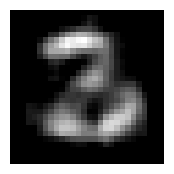

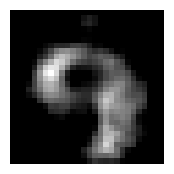

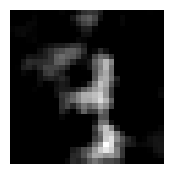

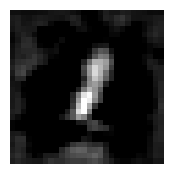

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generate random latent vectors (for testing)
num_images = 4
random_latent_vectors = np.random.normal(size=(num_images, 4))  # Shape should be (num_images, 4)
test_set=ts_x[:4]
latent_features=encoder.predict(test_set)

# Generate images from random latent vectors using the decoder
gen_images = decoder.predict(random_latent_vectors)
print(gen_images[0].shape)
# Display the generated images
for i in range(num_images):
    plt.figure(figsize=(2, 2))
    plt.imshow(gen_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.show()

##Task 2 (14 points)

1. Load the dataset from the attached file "rnn.csv".
2. Prepare data for the RNN model and set the window size to 8. Use 20 % of the dataset as the test set.
3. Create a model with two RNN layers (SimpleRNN), 2 RNN nodes each, capable of predicting the next value from the input dataset. Do not forget to use return sequences.
4. Train the model on train set data. Use epochs = 10, batch size = 20. Shuffle the train data.
5. Evaluate the model quality on the test set and print the mse value.
6. Create the graph of model prediction (output) for the first 15 rows (examples) from the test set.
7. Insert the corresponding real values into the same graph to verify the model prediction capabilities.


In [ ]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Download latest version
path = kagglehub.dataset_download("szrlee/stock-time-series-20050101-to-20171231")

data=pd.read_csv(path+'/IBM_2006-01-01_to_2018-01-01.csv')

data=data.iloc[:,3]
data.head()

data=data.fillna(0)
print(data.isnull().sum())

100%|██████████| 3.03M/3.03M [00:00<00:00, 55.5MB/s]

Extracting files...


,Low
0,80.81
1,81.33
2,81.00
3,83.41
4,83.38


(3013, 8)
(3013,)
(2410, 8)
(603, 8)
(2410,)
(603,)
Epoch 1/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 1.3795e-04 - loss: 3244.0940 - val_accuracy: 0.0000e+00 - val_loss: 8.4137
Epoch 2/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 4.2308e-05 - loss: 17.5542 - val_accuracy: 0.0000e+00 - val_loss: 8.9828
Epoch 3/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 4.6390e-04 - loss: 19.2221 - val_accuracy: 0.0000e+00 - val_loss: 8.3863
Epoch 4/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 6.8023e-06 - loss: 11.8445 - val_accuracy: 0.0000e+00 - val_loss: 11.3599
Epoch 5/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 6.9129e-05 - loss: 48.9485 - val_accuracy: 0.0000e+00 - val_loss: 8.1046
Epoch 6/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.7213e-04 - loss: 9.7571 - val_accuracy: 0.0000e+00 - val_loss: 10.7293
Epoch 7/10
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.7135e-05 - loss: 22.8252 - val_accuracy: 0.0000e+00 - va

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_29 (SimpleRNN)            │ (None, 8, 16)               │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_30 (SimpleRNN)            │ (None, 32)                  │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,669 (22.15 KB)

 Trainable params: 1,889 (7.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,780 (14.77 KB)

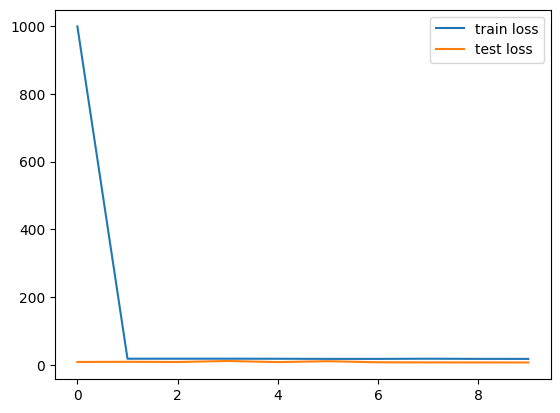

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import models,layers,optimizers, Sequential
import matplotlib.pyplot as plt

size=data.shape[0]
window=8
tr_x=np.zeros((size-window+1,window))
tr_y=np.zeros((size-window+1,))

for i in range(size-window):
  for j in range(window):
    tr_x[i][j]=data[i+j]
  tr_y[i]=data[window+i]

print(tr_x.shape)
print(tr_y.shape)

X_train, X_test, y_train, y_test=train_test_split(tr_x,tr_y,test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model=Sequential([
    layers.Input(shape=(8,1)),
    layers.SimpleRNN(16, activation='relu', return_sequences=True,),
    layers.SimpleRNN(32, activation='relu', return_sequences=False),
    layers.Dense(1,activation='linear')
])

model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])
history=model.fit(x=X_train, y=y_train, batch_size=20, epochs=10, verbose='auto',validation_data=(X_test,y_test))
model.summary()

plt.plot(history.history['loss'],label="train loss")
plt.plot(history.history['val_loss'],label="test loss")
plt.legend()
plt.show()

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(15, 1)
(15,)


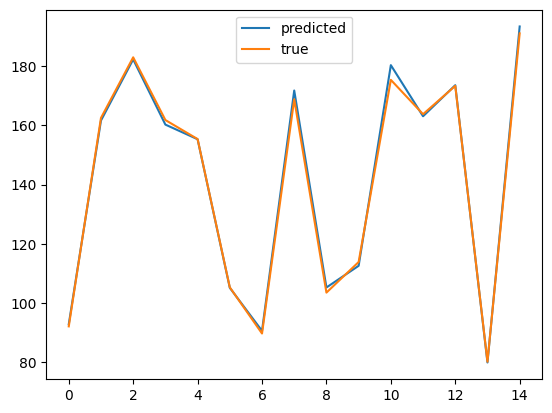

In [ ]:
predict=model.predict(X_test)[:15]
true=y_test[:15]

print(predict.shape)
print(true.shape)
plt.plot(predict,label="predicted")
plt.plot(true,label="true")
plt.legend()
plt.show()